In [ ]:
!unzip "/content/drive/MyDrive/TumorSegmentasyon/data.zip" -d "/content/"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/data/train/labels/Papiloma_T1C+_7.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_70.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_71.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_73.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_74.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_76.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_77.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_79.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_8.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_80.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_81.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_82.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_83.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_85.txt  
  inflating: /content/data/train/labels/Papiloma_T1C+_86.txt  
  inflatin

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
train_images = []
train_masks = []
train_masks_temp = []
val_images = []
val_masks = []
val_masks_temp = []
test_images = []
test_masks = []
test_masks_temp = []

path = "/content/data/train/images/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    train_images.append(path + fileName)

path = "/content/data/train/masks/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    train_masks_temp.append(path + fileName)

path = "/content/data/val/images/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    val_images.append(path + fileName)

path = "/content/data/val/masks/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    val_masks_temp.append(path + fileName)

path = "/content/data/test/images/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    test_images.append(path + fileName)

path = "/content/data/test/masks/"
tarama=os.scandir(path)
for belge in tarama:
    fileName = belge.name
    test_masks_temp.append(path + fileName)

In [ ]:
print(len(train_images))
print(len(train_masks))
print(len(train_masks_temp))
print(len(val_images))
print(len(val_masks))
print(len(val_masks_temp))
print(len(test_images))
print(len(test_masks))
print(len(test_masks_temp))

3160
0
3160
405
0
405
391
0
391


In [ ]:
for imagePath in train_images:
    for maskPath in train_masks_temp:
        imageName = imagePath.split("/")[-1].split(".")[0]
        maskName = maskPath.split("/")[-1].split(".")[0][:-5]
        if (imageName == maskName):
            train_masks.append(maskPath)
            break

for imagePath in val_images:
    for maskPath in val_masks_temp:
        imageName = imagePath.split("/")[-1].split(".")[0]
        maskName = maskPath.split("/")[-1].split(".")[0][:-5]
        if (imageName == maskName):
            val_masks.append(maskPath)
            break

for imagePath in test_images:
    for maskPath in test_masks_temp:
        imageName = imagePath.split("/")[-1].split(".")[0]
        maskName = maskPath.split("/")[-1].split(".")[0][:-5]
        if (imageName == maskName):
            test_masks.append(maskPath)
            break

In [ ]:
print(len(train_images))
print(len(train_masks))
print(len(train_masks_temp))
print(len(val_images))
print(len(val_masks))
print(len(val_masks_temp))
print(len(test_images))
print(len(test_masks))
print(len(test_masks_temp))

3160
3160
3160
405
405
405
391
391
391


In [ ]:
print(train_images[0], train_masks[0])
print(val_images[0], val_masks[0])
print(test_images[0], test_masks[0])

/content/data/train/images/Meningioma_T1C+_196.jpg /content/data/train/masks/Meningioma_T1C+_196_mask.jpg
/content/data/val/images/Schwannoma_T1C+_42.jpeg /content/data/val/masks/Schwannoma_T1C+_42_mask.jpg
/content/data/test/images/Schwannoma_T2_59.jpeg /content/data/test/masks/Schwannoma_T2_59_mask.jpg


In [ ]:
def get_df(image_paths, mask_paths):
    pd_df = pd.DataFrame({
        'image_paths' : image_paths,
        'mask_paths' : mask_paths
    })
    return pd_df

In [ ]:
train_df = get_df(train_images, train_masks)
val_df = get_df(val_images, val_masks)
test_df = get_df(test_images, test_masks)

In [ ]:
train_df

,image_paths,mask_paths
0,/content/data/train/images/Meningioma_T1C+_196...,/content/data/train/masks/Meningioma_T1C+_196_...
1,/content/data/train/images/Meningioma_T2_134.jpeg,/content/data/train/masks/Meningioma_T2_134_ma...
2,/content/data/train/images/Glioblastoma_T1_9.jpeg,/content/data/train/masks/Glioblastoma_T1_9_ma...
3,/content/data/train/images/Ependimoma_T2_24.jpeg,/content/data/train/masks/Ependimoma_T2_24_mas...
4,/content/data/train/images/Schwannoma_T1C+_38.jpg,/content/data/train/masks/Schwannoma_T1C+_38_m...
...,...,...
3155,/content/data/train/images/Astrocitoma_T2_36.jpeg,/content/data/train/masks/Astrocitoma_T2_36_ma...
3156,/content/data/train/images/Schwannoma_T1C+_94.jpg,/content/data/train/masks/Schwannoma_T1C+_94_m...
3157,/content/data/train/images/Ependimoma_T2_30.jpeg,/content/data/train/masks/Ependimoma_T2_30_mas...
3158,/content/data/train/images/Carcinoma_T1_48.jpeg,/content/data/train/masks/Carcinoma_T1_48_mask...


In [ ]:
val_df

,image_paths,mask_paths
0,/content/data/val/images/Schwannoma_T1C+_42.jpeg,/content/data/val/masks/Schwannoma_T1C+_42_mas...
1,/content/data/val/images/Schwannoma_T1C+_6.jpeg,/content/data/val/masks/Schwannoma_T1C+_6_mask...
2,/content/data/val/images/Tuberculoma_T1C+_78.jpeg,/content/data/val/masks/Tuberculoma_T1C+_78_ma...
3,/content/data/val/images/Papiloma_T1C+_103.jpeg,/content/data/val/masks/Papiloma_T1C+_103_mask...
4,/content/data/val/images/Ganglioglioma_T1_1.jpeg,/content/data/val/masks/Ganglioglioma_T1_1_mas...
...,...,...
400,/content/data/val/images/Tuberculoma_T1_9.jpeg,/content/data/val/masks/Tuberculoma_T1_9_mask.jpg
401,/content/data/val/images/Astrocitoma_T1C+_220....,/content/data/val/masks/Astrocitoma_T1C+_220_m...
402,/content/data/val/images/Carcinoma_T2_56.jpeg,/content/data/val/masks/Carcinoma_T2_56_mask.jpg
403,/content/data/val/images/Schwannoma_T1_63.jpeg,/content/data/val/masks/Schwannoma_T1_63_mask.jpg


In [ ]:
test_df

,image_paths,mask_paths
0,/content/data/test/images/Schwannoma_T2_59.jpeg,/content/data/test/masks/Schwannoma_T2_59_mask...
1,/content/data/test/images/Meduloblastoma_T2_29...,/content/data/test/masks/Meduloblastoma_T2_29_...
2,/content/data/test/images/Astrocitoma_T2_95.jpeg,/content/data/test/masks/Astrocitoma_T2_95_mas...
3,/content/data/test/images/Meduloblastoma_T1C+_...,/content/data/test/masks/Meduloblastoma_T1C+_3...
4,/content/data/test/images/Germinoma_T1_23.jpg,/content/data/test/masks/Germinoma_T1_23_mask.jpg
...,...,...
386,/content/data/test/images/Tuberculoma_T1C+_13....,/content/data/test/masks/Tuberculoma_T1C+_13_m...
387,/content/data/test/images/Granuloma_T1C+_11.jpeg,/content/data/test/masks/Granuloma_T1C+_11_mas...
388,/content/data/test/images/Astrocitoma_T2_11.jpeg,/content/data/test/masks/Astrocitoma_T2_11_mas...
389,/content/data/test/images/Meningioma_T1C+_296....,/content/data/test/masks/Meningioma_T1C+_296_m...


In [ ]:
img_size = (256, 256)
batch_size = 16

In [ ]:
def set_generator(data_frame, batch_size, aug_dict, target_size,
                    image_color_mode="rgb",
                    mask_color_mode="grayscale",
                    image_save_prefix="image",
                    mask_save_prefix="mask",
                    save_to_dir=None,
                    seed=1):

    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)

    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = "image_paths",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask_paths",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)

    train_gen = zip(image_generator, mask_generator)

    for (img, mask) in train_gen:
        img, mask = adjust_data(img, mask)
        yield (img,mask)

def adjust_data(img,mask):
    img = img / 255.
    mask = mask / 255.
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0

    return (img, mask)

In [ ]:
train_gen = set_generator(train_df, batch_size, dict(), img_size)

val_gen = set_generator(val_df, batch_size, dict(), img_size)

test_gen = set_generator(test_df, batch_size, dict(), img_size)

In [ ]:
def unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # First DownConvolution / Encoder Leg will begin, so start with Conv2D
    conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(inputs)
    bn1 = Activation("relu")(conv1)
    conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(bn1)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn1 = Activation("relu")(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)

    conv2 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(pool1)
    bn2 = Activation("relu")(conv2)
    conv2 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(bn2)
    bn2 = BatchNormalization(axis=3)(conv2)
    bn2 = Activation("relu")(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

    conv3 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(pool2)
    bn3 = Activation("relu")(conv3)
    conv3 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(bn3)
    bn3 = BatchNormalization(axis=3)(conv3)
    bn3 = Activation("relu")(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)

    conv4 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(pool3)
    bn4 = Activation("relu")(conv4)
    conv4 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(bn4)
    bn4 = BatchNormalization(axis=3)(conv4)
    bn4 = Activation("relu")(bn4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

    conv5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same")(pool4)
    bn5 = Activation("relu")(conv5)
    conv5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same")(bn5)
    bn5 = BatchNormalization(axis=3)(conv5)
    bn5 = Activation("relu")(bn5)

    """ Now UpConvolution / Decoder Leg will begin, so start with Conv2DTranspose
    The gray arrows (in the above image) indicate the skip connections that concatenate the encoder feature map with the decoder, which helps the backward flow of gradients for improved training. """
    """ After every concatenation we again apply two consecutive regular convolutions so that the model can learn to assemble a more precise output """

    up6 = concatenate([Conv2DTranspose(512, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn5), conv4], axis=3)
    conv6 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(up6)
    bn6 = Activation("relu")(conv6)
    conv6 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(bn6)
    bn6 = BatchNormalization(axis=3)(conv6)
    bn6 = Activation("relu")(bn6)

    up7 = concatenate([Conv2DTranspose(256, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn6), conv3], axis=3)
    conv7 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(up7)
    bn7 = Activation("relu")(conv7)
    conv7 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(bn7)
    bn7 = BatchNormalization(axis=3)(conv7)
    bn7 = Activation("relu")(bn7)

    up8 = concatenate([Conv2DTranspose(128, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn7), conv2], axis=3)
    conv8 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(up8)
    bn8 = Activation("relu")(conv8)
    conv8 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(bn8)
    bn8 = BatchNormalization(axis=3)(conv8)
    bn8 = Activation("relu")(bn8)

    up9 = concatenate([Conv2DTranspose(64, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn8), conv1], axis=3)
    conv9 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(up9)
    bn9 = Activation("relu")(conv9)
    conv9 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(bn9)
    bn9 = BatchNormalization(axis=3)(conv9)
    bn9 = Activation("relu")(bn9)

    conv10 = Conv2D(filters=1, kernel_size=(1, 1), activation="sigmoid")(bn9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
def dice_coef(y_true, y_pred, smooth=100):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)

    intersection = K.sum(y_true_flatten * y_pred_flatten)
    union = K.sum(y_true_flatten) + K.sum(y_pred_flatten)
    return (2.0 * intersection + smooth) / (union + smooth)

def iou_coef(y_true, y_pred, smooth=100):
    intersection = K.sum(y_true * y_pred)
    sum = K.sum(y_true + y_pred)
    iou = (intersection + smooth) / (sum - intersection + smooth)
    return iou

In [ ]:
model = unet()

model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), dice_coef, iou_coef])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 256, 256, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['activation[0][0]']          
                                                                                              

In [ ]:
file_path = "Clean-UNet-Adamax-16-bce.h5"
save_path = "/content/" + file_path
drive_path = "/content/drive/MyDrive/TumorSegmentasyon/" + file_path

In [ ]:
checkpoint = ModelCheckpoint(save_path,
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='min',
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=3,
                              mode='min',
                              min_lr=0.0001,
                              verbose= 1)

early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           mode='min',
                           restore_best_weights=True,
                           verbose=1)

history = model.fit(train_gen,
                    epochs= 100,
                    callbacks=[early_stop, checkpoint, reduce_lr],
                    validation_data= val_gen,
                    steps_per_epoch=len(train_df) / batch_size,
                    validation_steps=len(val_df) / batch_size)

Found 3160 validated image filenames.
Found 3160 validated image filenames.
Epoch 1/100
198/197 [==============================] - ETA: 0s - loss: 0.1399 - accuracy: 0.9682 - precision: 0.1966 - recall: 0.0665 - dice_coef: 0.0990 - iou_coef: 0.0528Found 405 validated image filenames.
Found 405 validated image filenames.

Epoch 1: val_loss improved from inf to 0.33246, saving model to /content/Clean-UNet-Adamax-16-bce.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


197/197 [==============================] - 229s 932ms/step - loss: 0.1399 - accuracy: 0.9682 - precision: 0.1966 - recall: 0.0665 - dice_coef: 0.0990 - iou_coef: 0.0528 - val_loss: 0.3325 - val_accuracy: 0.9739 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_dice_coef: 0.0525 - val_iou_coef: 0.0272 - lr: 0.0010
Epoch 2/100
198/197 [==============================] - ETA: 0s - loss: 0.0918 - accuracy: 0.9754 - precision: 0.6808 - recall: 0.1270 - dice_coef: 0.1742 - iou_coef: 0.0969
Epoch 2: val_loss improved from 0.33246 to 0.11590, saving model to /content/Clean-UNet-Adamax-16-bce.h5
197/197 [==============================] - 165s 835ms/step - loss: 0.0918 - accuracy: 0.9754 - precision: 0.6808 - recall: 0.1270 - dice_coef: 0.1742 - iou_coef: 0.0969 - val_loss: 0.1159 - val_accuracy: 0.9737 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_dice_coef: 0.0402 - val_iou_coef: 0.0214 - lr: 0.0010
Epoch 3/100
198/197 [==============================] - ETA: 0s - loss: 0.0

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_iou = hist.history['iou_coef']
    tr_dice = hist.history['dice_coef']
    tr_loss = hist.history['loss']

    val_acc = hist.history['val_accuracy']
    val_iou = hist.history['val_iou_coef']
    val_dice = hist.history['val_dice_coef']
    val_loss = hist.history['val_loss']

    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    index_iou = np.argmax(iou_coef)
    iou_highest = val_iou[index_iou]
    index_dice = np.argmax(dice_coef)
    dice_highest = val_dice[index_dice]
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]

    Epochs = [i+1 for i in range(len(tr_acc))]

    acc_label = f'best epoch= {str(index_acc + 1)}'
    iou_label = f'best epoch= {str(index_iou + 1)}'
    dice_label = f'best epoch= {str(index_dice + 1)}'
    loss_label = f'best epoch= {str(index_loss + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 20))
    plt.style.use('fivethirtyeight')

    # Training Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training IoU
    plt.subplot(2, 2, 2)
    plt.plot(Epochs, tr_iou, 'r', label= 'Training IoU')
    plt.plot(Epochs, val_iou, 'g', label= 'Validation IoU')
    plt.scatter(index_iou + 1 , iou_highest, s= 150, c= 'blue', label= iou_label)
    plt.title('Training and Validation IoU Coefficient')
    plt.xlabel('Epochs')
    plt.ylabel('IoU')
    plt.legend()

    # Training Dice
    plt.subplot(2, 2, 3)
    plt.plot(Epochs, tr_dice, 'r', label= 'Training Dice')
    plt.plot(Epochs, val_dice, 'g', label= 'Validation Dice')
    plt.scatter(index_dice + 1 , dice_highest, s= 150, c= 'blue', label= dice_label)
    plt.title('Training and Validation Dice Coefficient')
    plt.xlabel('Epochs')
    plt.ylabel('Dice')
    plt.legend()

    # Training Loss
    plt.subplot(2, 2, 4)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout
    plt.show()

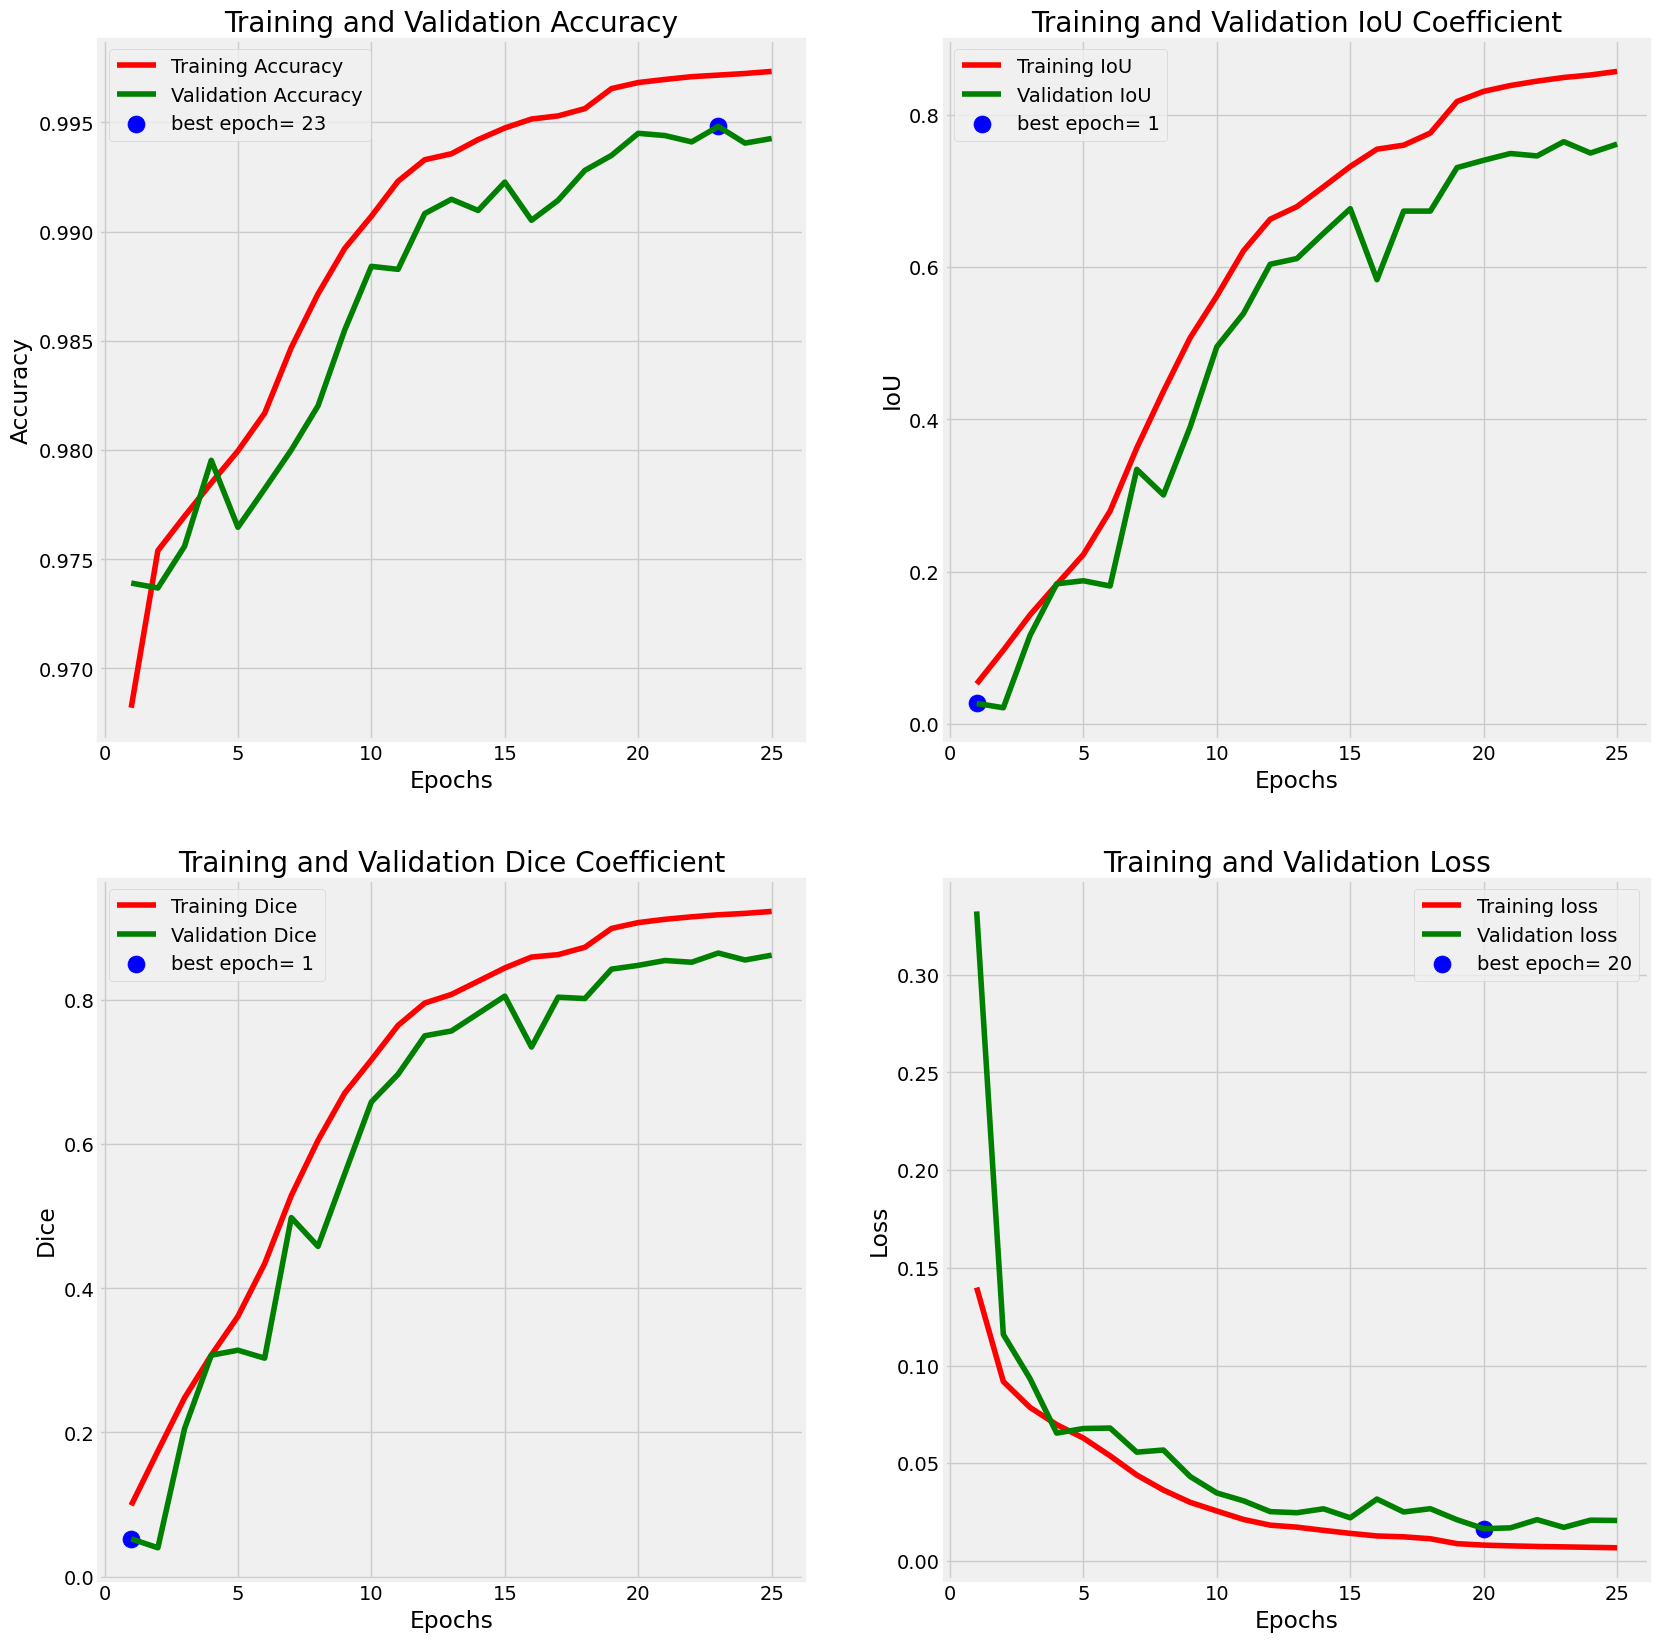

In [ ]:
plot_training(history)

In [ ]:
print(model.metrics_names)

['loss', 'accuracy', 'precision', 'recall', 'dice_coef', 'iou_coef']


In [ ]:
train_score = model.evaluate(train_gen, steps= len(train_df) / batch_size, verbose= 1)
valid_score = model.evaluate(val_gen, steps= len(val_df) / batch_size, verbose= 1)
test_score = model.evaluate(test_gen, steps= len(test_df) / batch_size, verbose= 1)


print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print("Train Precision: ", train_score[2])
print("Train Recall: ", train_score[3])
print("Train Dice: ", train_score[4])
print("Train IoU: ", train_score[5])
print('-' * 20)

print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print("Valid Precision: ", valid_score[2])
print("Valid Recall: ", valid_score[3])
print("Valid Dice: ", valid_score[4])
print("Valid IoU: ", valid_score[5])
print('-' * 20)

print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print("Test Precision: ", test_score[2])
print("Test Recall: ", test_score[3])
print("Test Dice: ", test_score[4])
print("Test IoU: ", test_score[5])

25/25 [==============================] - 6s 243ms/step - loss: 0.0181 - accuracy: 0.9942 - precision: 0.9085 - recall: 0.8661 - dice_coef: 0.8555 - iou_coef: 0.7496
Found 391 validated image filenames.
Found 391 validated image filenames.
24/24 [==============================] - 14s 569ms/step - loss: 0.0149 - accuracy: 0.9948 - precision: 0.9232 - recall: 0.8773 - dice_coef: 0.8673 - iou_coef: 0.7671
Train Loss:  0.007622123695909977
Train Accuracy:  0.9970211982727051
Train Precision:  0.9460985064506531
Train Recall:  0.9408130049705505
Train Dice:  0.9069440364837646
Train IoU:  0.8305571675300598
--------------------
Valid Loss:  0.01809321716427803
Valid Accuracy:  0.994152843952179
Valid Precision:  0.9085447788238525
Valid Recall:  0.8661473989486694
Valid Dice:  0.8554893136024475
Valid IoU:  0.7496494054794312
--------------------
Test Loss:  0.01487495843321085
Test Accuracy:  0.9948161244392395
Test Precision:  0.9231618642807007
Test Recall:  0.8772913217544556
Test Dice: 

Validation Images


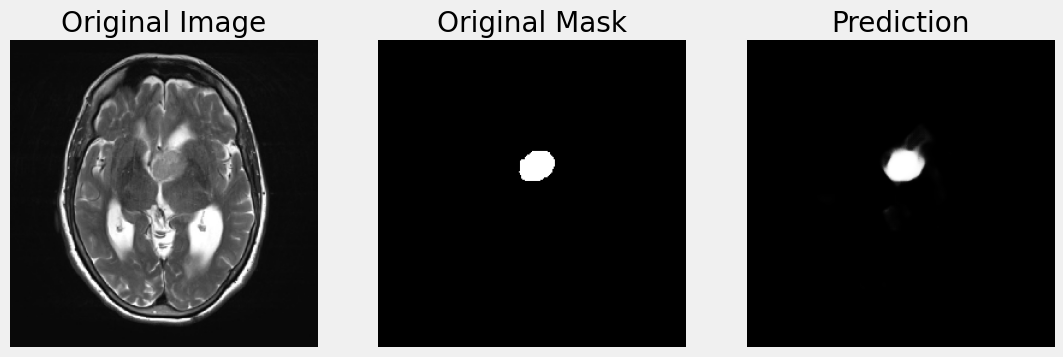

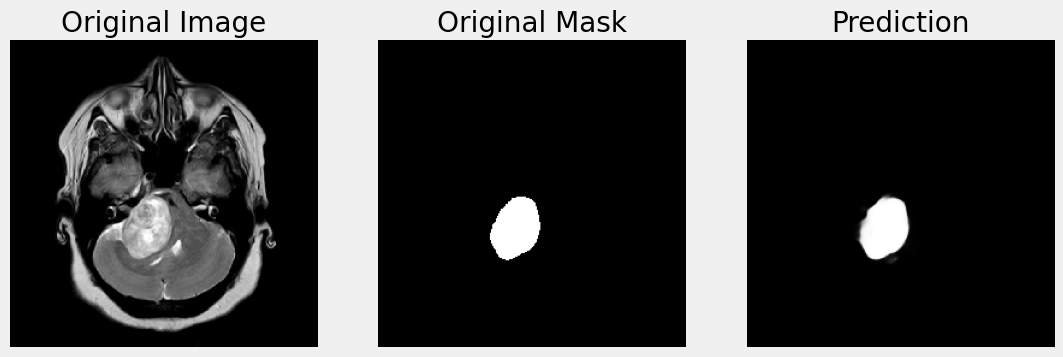

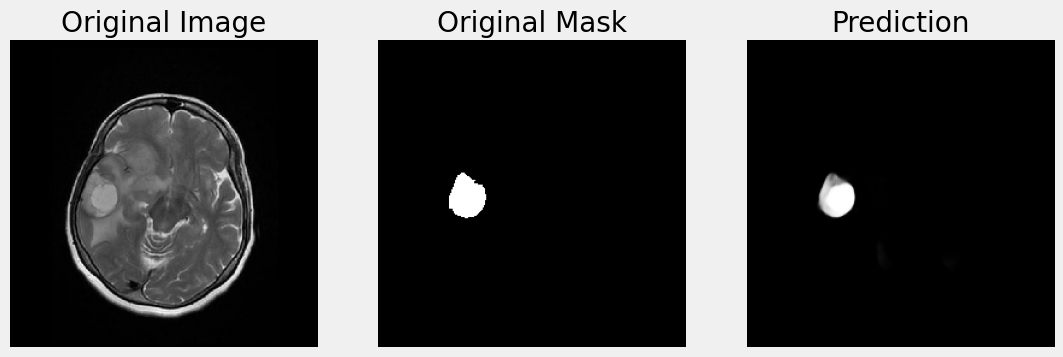

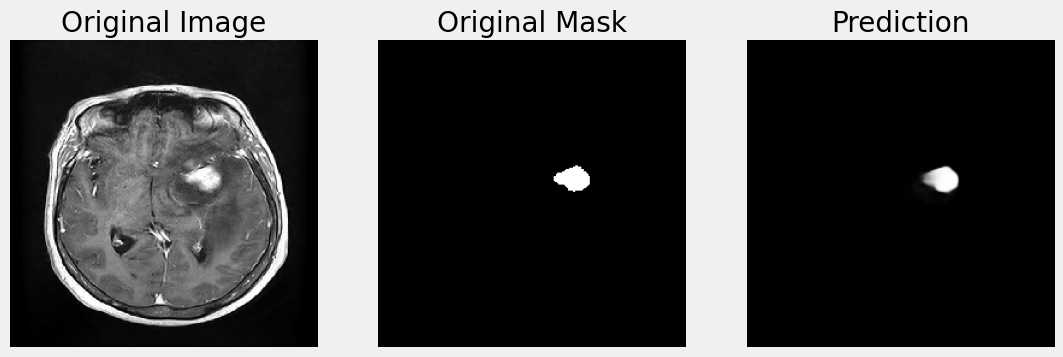

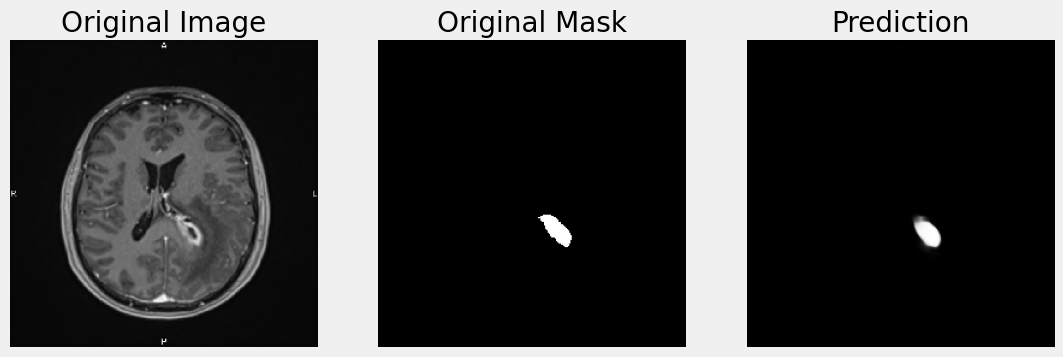

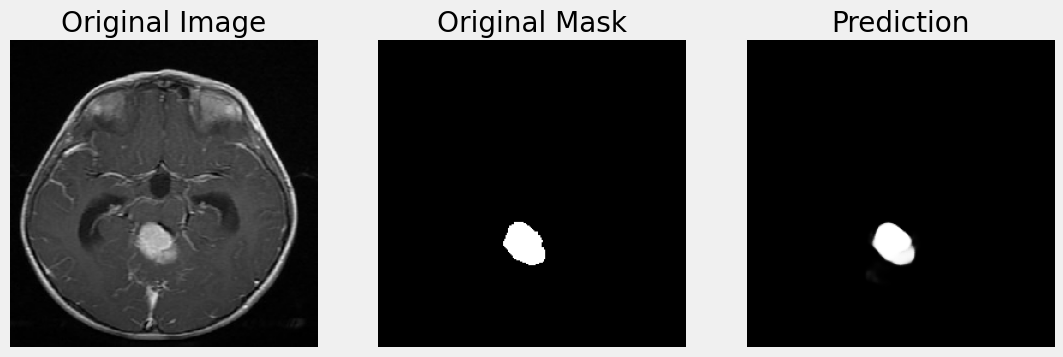

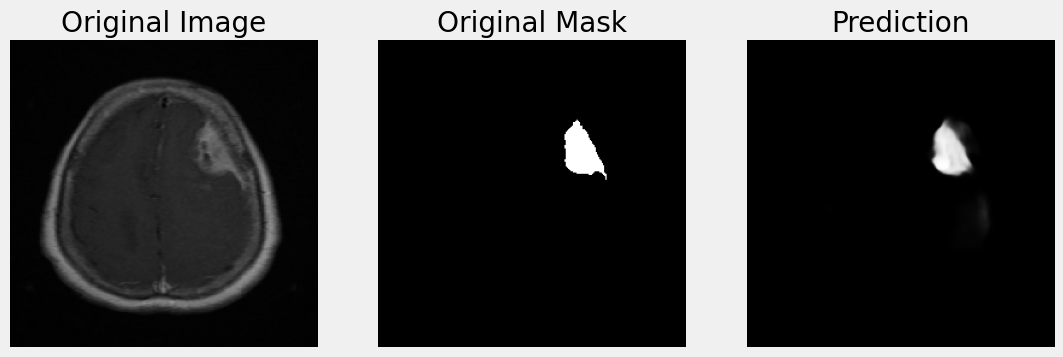

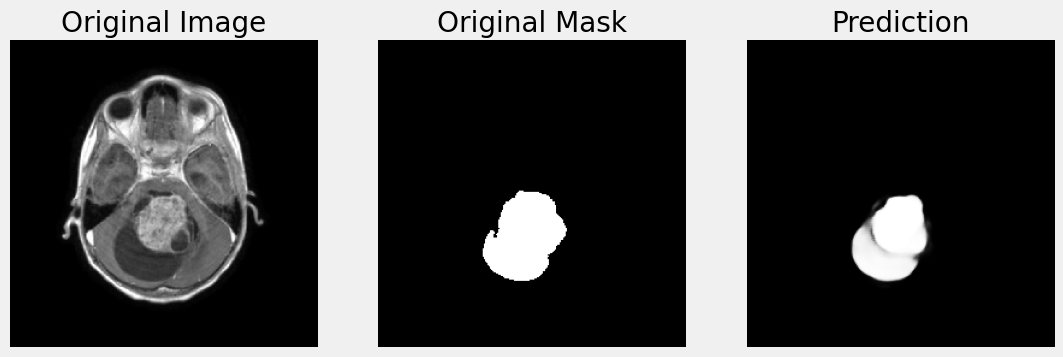

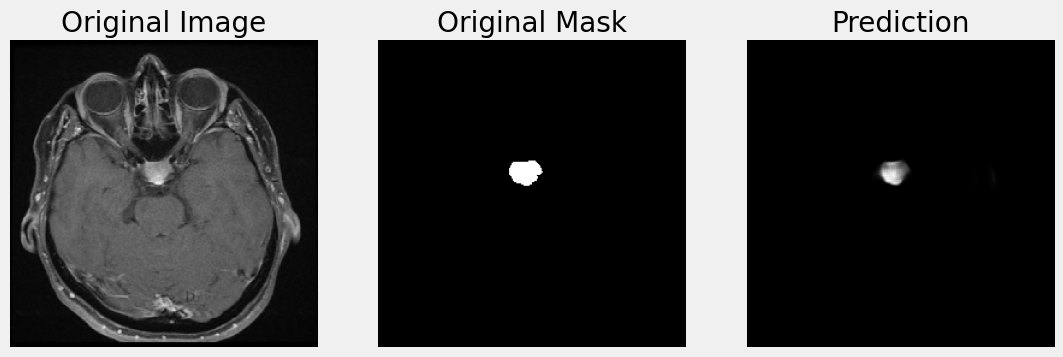

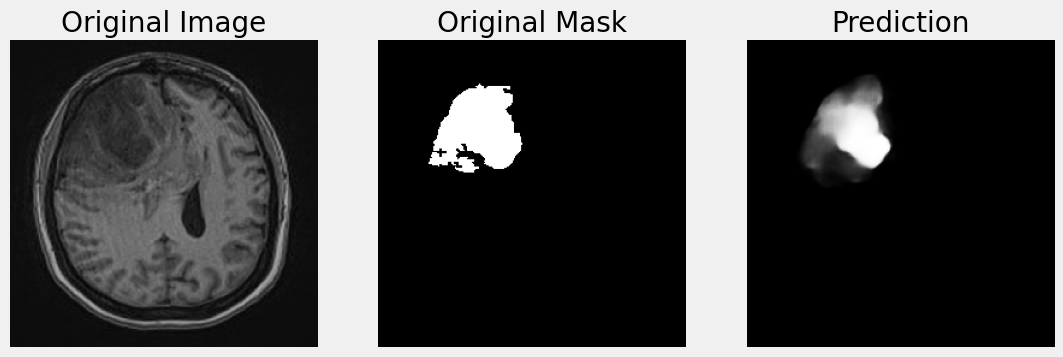

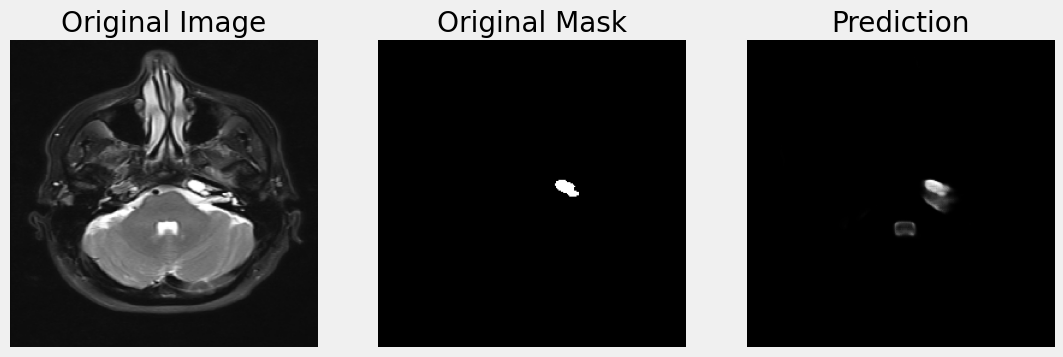

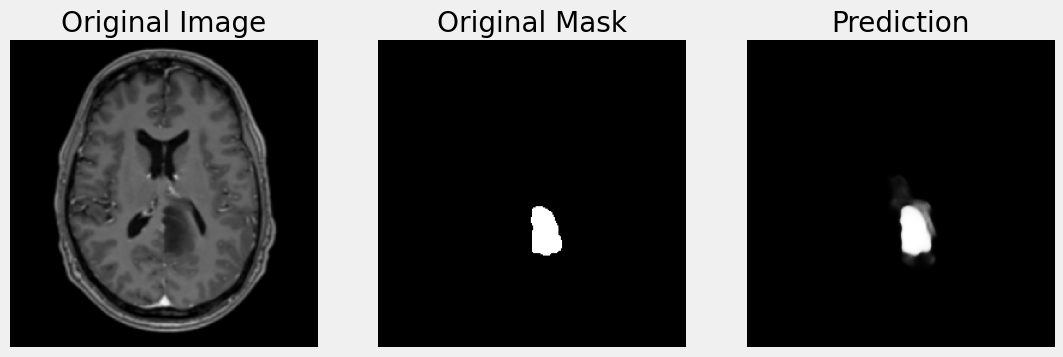

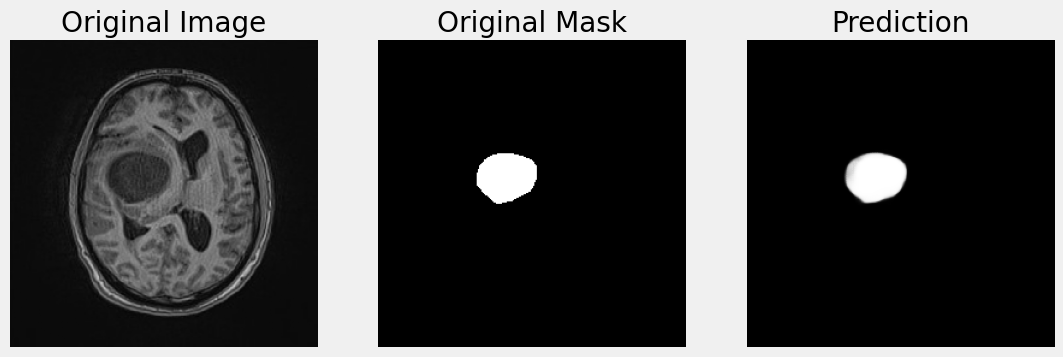

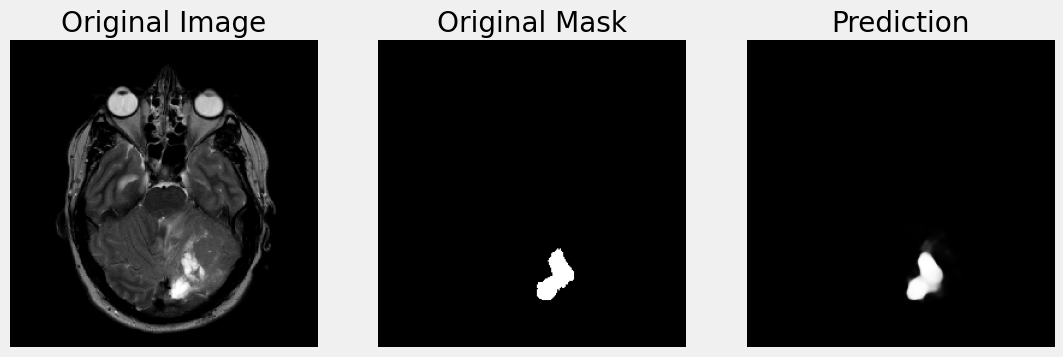

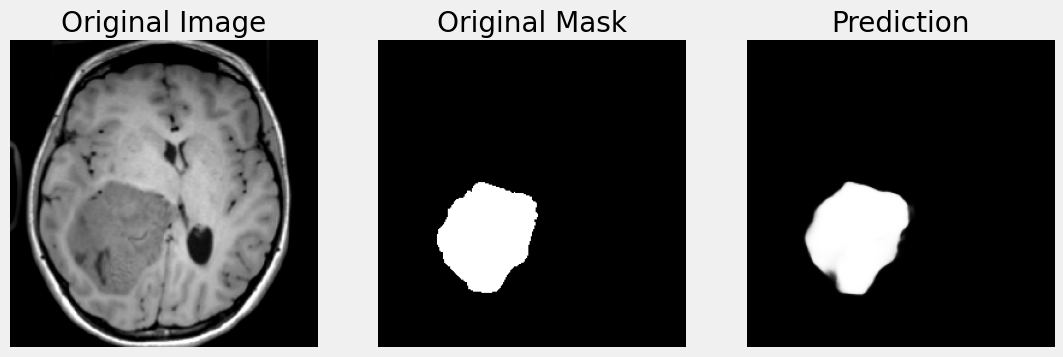

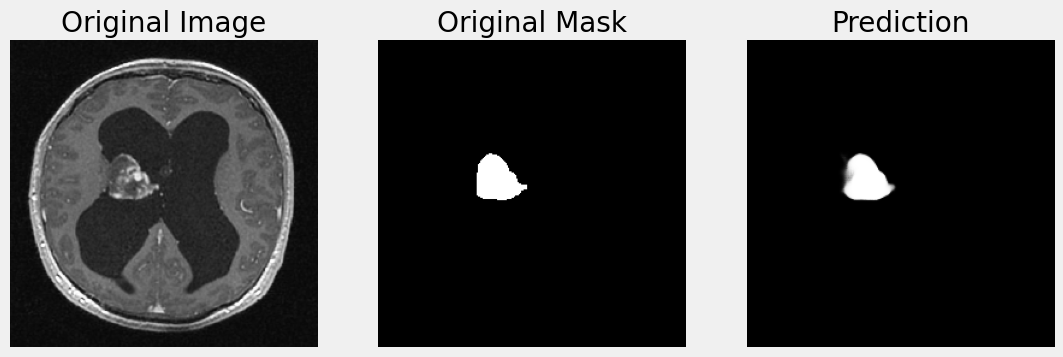

In [ ]:
print("Validation Images")
batch = next(val_gen)
preds = model.predict_on_batch(batch[0])
for _ in range(batch_size):
    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    plt.imshow(batch[0][_])
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(batch[1][_], cmap="gray")
    plt.axis('off')
    plt.title('Original Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(preds[_], cmap="gray")
    plt.axis('off')
    plt.title('Prediction')

    plt.show()

In [ ]:
print("Test Images")
batch = next(test_gen)
preds = model.predict_on_batch(batch[0])
for _ in range(batch_size):
    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    plt.imshow(batch[0][_])
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(batch[1][_], cmap="gray")
    plt.axis('off')
    plt.title('Original Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(preds[_], cmap="gray")
    plt.axis('off')
    plt.title('Prediction')

    plt.show()

In [ ]:
shutil.copy(save_path, drive_path)

'/content/drive/MyDrive/TumorSegmentasyon/Clean-UNet-Adamax-16-bce.h5'